Tarea 02

In [ ]:
# libraries for data analysis 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# libararies for estimation model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Load the datasets
test_df = pd.read_csv('../data/test.csv')
train_df = pd.read_csv('../data/train.csv')
sample_df = pd.read_csv('../data/sample_submission.csv')

# print information about data shape
print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))
print("Full sample sales price dataset shape is {}".format(sample_df.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)
Full sample sales price dataset shape is (1459, 2)


In [ ]:
# Take away (drop) first column (only index)
train_df=train_df.drop('Id', axis= 1)
# and plot info about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64


/tmp/ipykernel_28207/1838168039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_df['SalePrice'][:1460], color='g', bins=100, hist_kws={'alpha': 0.4});


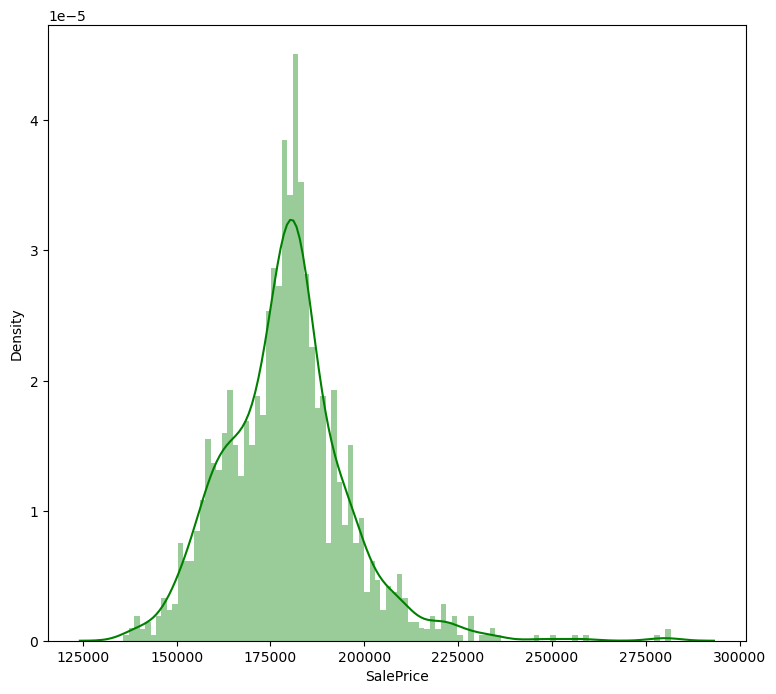

In [ ]:
# print and plot statistics about 'SalePrice'
print(sample_df['SalePrice'][:1460].describe())
plt.figure(figsize=(9, 8))
# distribution plot of 'SalePrice'
sns.distplot(sample_df['SalePrice'][:1460], color='g', bins=100, hist_kws={'alpha': 0.4});

In [111]:
# Select only numeric columns from train_df and test_df
train_df_numeric = train_df.select_dtypes(include=[np.number])
test_df_numeric = test_df.select_dtypes(include=[np.number])

# Display the first few rows of the numeric dataframes
print(train_df_numeric.head(3))
print("Numeric train dataset shape is {}".format(train_df_numeric.shape))
print(test_df_numeric.head(3))
print("Numeric test dataset shape is {}".format(test_df_numeric.shape))
test_df_numeric=test_df_numeric.drop('Id', axis=1)


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       

To analyse which variables effect most the price, a correlation calculated and the values above abs(xcorr)>0.5 are marked.

/tmp/ipykernel_28207/3064663113.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return data.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.5 else "")


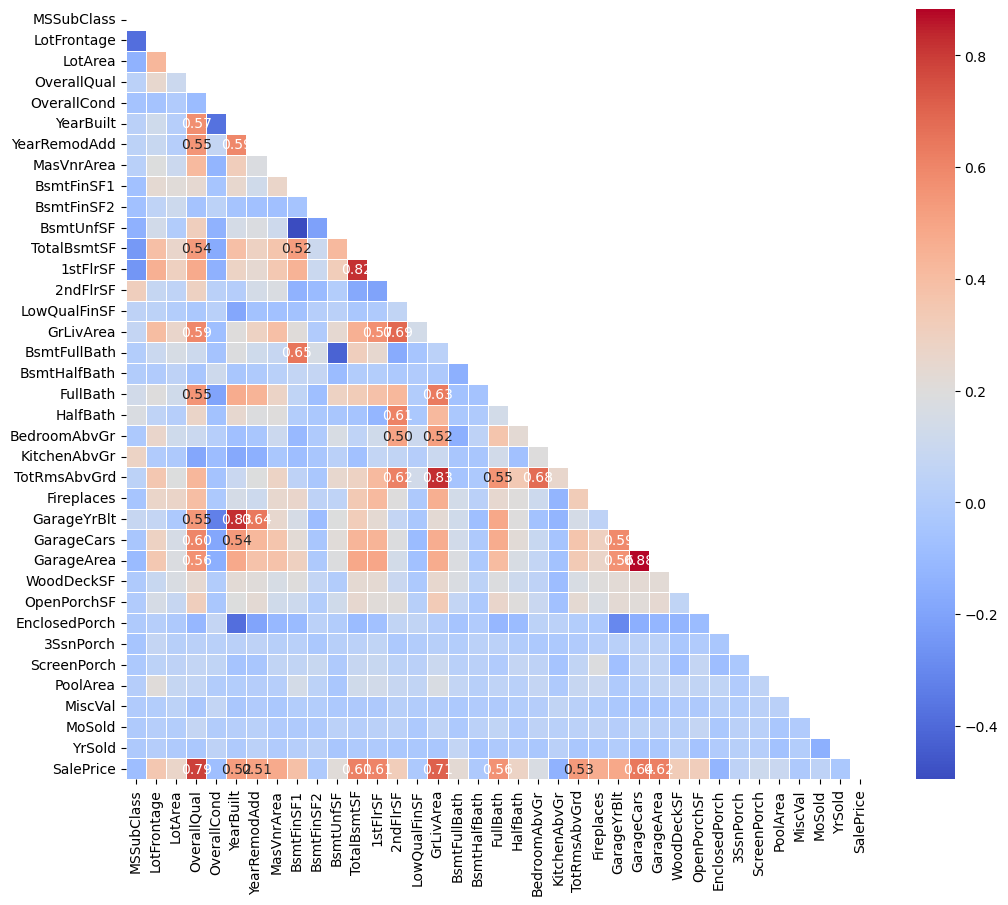

In [ ]:
# Compute the correlation matrix
train_corr = train_df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_corr, dtype=bool))

# Create a custom annotation function
def annot_func(data):
    return data.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_corr, mask=mask, annot=annot_func(train_corr), fmt="", cmap='coolwarm', linewidths=.5)
plt.show()



In [101]:
# reduce data matrix to correlation values abs(xcorr)>0.5
high_corr_cols = train_corr.index[train_corr['SalePrice'].abs() > 0.5]
high_corr_train_df = train_df_numeric[high_corr_cols]
print(high_corr_train_df.head())

high_corr_test_df = test_df_numeric[high_corr_cols.drop('SalePrice')]


   OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0         2             8           2         548     208500  
1         2             6           2         460     181500  
2         2             6           2         608     223500  
3         1             7           3         642     140000  
4         2             9           3         836     250000  


In [109]:
test_df_numeric['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [114]:
# Separate target variable and features
# drop 'SalePrice' column from input matrix and define it as output vector y
def estimate_sale_price(train, test, sample):
    '''estimated the house price depending on different inputs.

    Params:
        train: Train data 
        test: test data 
        sample: sales prices of test data.

    Returns:
        Returns a DataFrame that contains the estimated price the real price of the test data houses.
        It also returns the absolute and percentage of differences of real value and estiated values, 
    '''
    # deselect 'SalePrice' from train data ...
    X = train.drop('SalePrice', axis=1)
    # ... and save the prices in the y vector
    y = train_df['SalePrice']

    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = []  # No categorical columns in train_df_numeric
    # Preprocessing for numerical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Bundle preprocessing for numerical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols)
        ])

    # Define the model
    model = RandomForestRegressor(n_estimators=100, random_state=0)

    # Create and evaluate the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

    # Split data into train and test sets 80% vs 20%
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

    # Preprocessing of training data, fit model 
    pipeline.fit(X_train, y_train)

    # Preprocessing of validation data, get predictions
    preds = pipeline.predict(X_valid)

    # Evaluate the model
    mae = mean_absolute_error(y_valid, preds)
    mape = mean_absolute_percentage_error(y_valid, preds)
    print('Mean Absolute Error:', mae)
    print('Mean Absolute Percentage Error:', mape)

    # Predict on the test data
    #test_preds = pipeline.predict(test.drop('Id', axis=1))
    # Create a DataFrame for the submission
    submission = pd.DataFrame({#'Id': test['Id'], 
                               'SalePrice pred': test_preds,
                               'SalePrice': sample['SalePrice'],
                               'diff SalePrice': sample['SalePrice']- test_preds,
                               'percentage diff SalePrice': (sample['SalePrice']- test_preds)/sample['SalePrice']*100})

    # Display the first few rows of the submission DataFrame
    return submission



In [116]:
# analyse complete data
print('Print errors and results for complete analysis')
model_complete = estimate_sale_price(train_df_numeric, test_df_numeric, sample_df)
print(model_complete.head(3))
# analyse reduced data
print('')
print('Print errors and results for reduced analysis')
model_reduced = estimate_sale_price(high_corr_train_df , high_corr_test_df , sample_df)

Print errors and results for complete analysis
Mean Absolute Error: 17821.34824200913
Mean Absolute Percentage Error: 0.10005584930796722
   SalePrice pred      SalePrice  diff SalePrice  percentage diff SalePrice
0       125795.50  169277.052498    43481.552498                  25.686620
1       154608.50  187758.393989    33149.893989                  17.655612
2       180350.24  183583.683570     3233.443570                   1.761291

Print errors and results for reduced analysis
Mean Absolute Error: 19149.494679060663
Mean Absolute Percentage Error: 0.10865585757261532


Reviewing the results it is not recommended to reduce the data, the reduced data set does not run much faster and the results a little bit worse. 